In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
df=pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
import matplotlib.pyplot as plt

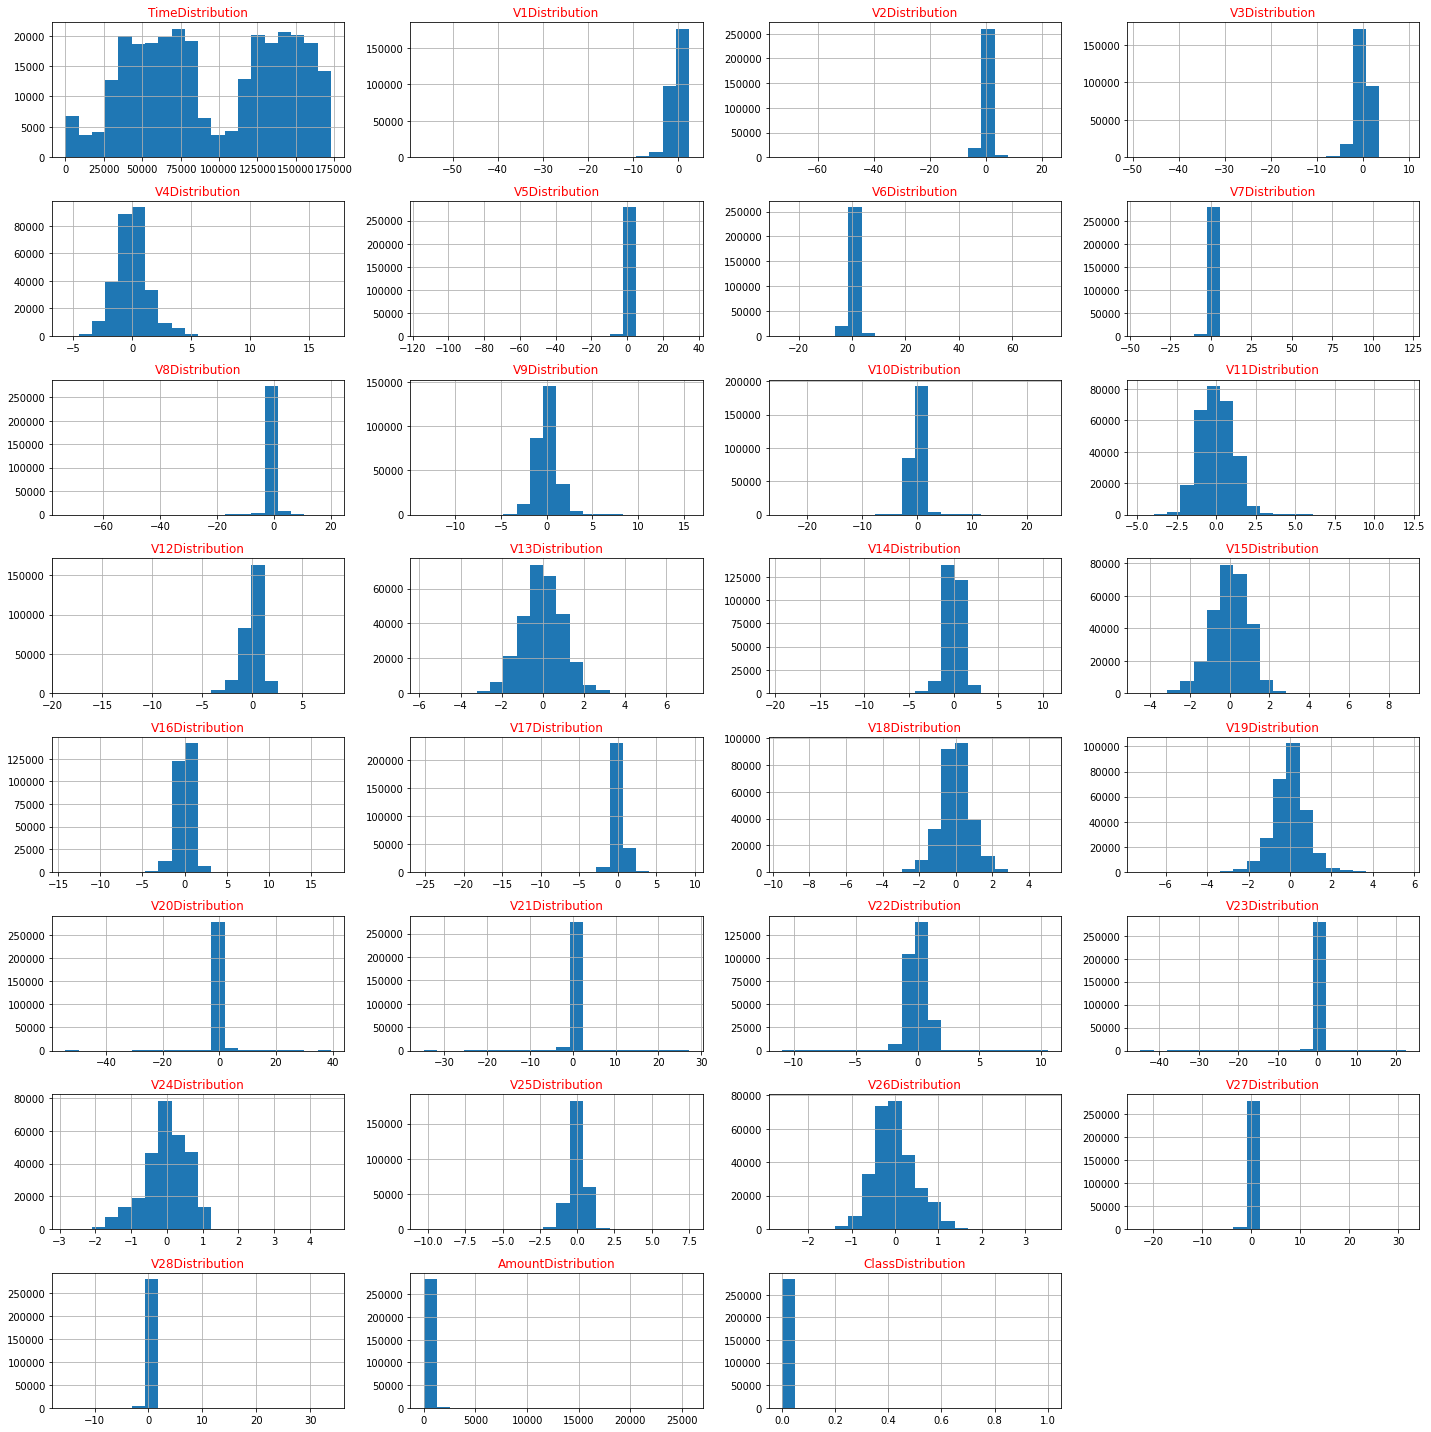

In [7]:
def draw_histogram(dataframe,features,rows,cols):
    fig=plt.figure(figsize=(20,20))
    for i,feature in enumerate(features):
        #print(i,feature)
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax)
        ax.set_title(feature+"Distribution",color='Red')
        #ax.set_yscale('log')
    fig.tight_layout()
    plt.show()
    
draw_histogram(df,df.columns,8,4)

In [8]:
X=df.drop('Class',axis=1)
y=df['Class']

In [9]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

## Logistic Regression

In [11]:
lr=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=2,shuffle=True)

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75)

In [13]:
clf=GridSearchCV(lr,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan 0.81103197        nan 0.82970177        nan 0.81236596
        nan 0.83263444        nan 0.8321024 ]
  category=UserWarning
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=KFold(n_splits=5, random_state=2, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [14]:
y_pred=clf.predict(X_test)

In [15]:
import seaborn as sns

<AxesSubplot:>

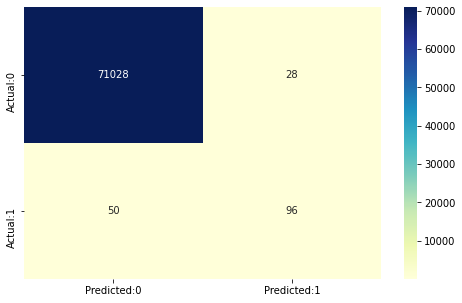

In [16]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [17]:
accuracy_score(y_test,y_pred)

0.9989045251537878

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71056
           1       0.77      0.66      0.71       146

    accuracy                           1.00     71202
   macro avg       0.89      0.83      0.86     71202
weighted avg       1.00      1.00      1.00     71202



Use precision when FP > FN

Use Recall when FN > FP

## UnderSampling Method: NearMiss

In [19]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [20]:
from collections import Counter
from imblearn.under_sampling import NearMiss

In [21]:
ns=NearMiss(version=1,n_neighbors=3)
X_train_ns,y_train_ns=ns.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 213259, 1: 346})
The number of classes after fit Counter({0: 346, 1: 346})


In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rfc=RandomForestClassifier()
rfc.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [24]:
y_pred=rfc.predict(X_test)

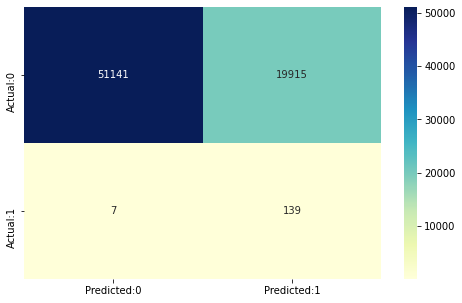

In [25]:
# confusion Matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84     71056
           1       0.01      0.95      0.01       146

    accuracy                           0.72     71202
   macro avg       0.50      0.84      0.43     71202
weighted avg       1.00      0.72      0.84     71202



- Using Undersampling method we get a better accuracy but precision value for class 1 is very low 

- But using this method and reducing the dataset can cause information loss and is not an appropriate method for real life data.

## OverSampling Method: SMOTE

In [27]:
from imblearn.over_sampling import SMOTE

In [29]:
smo=SMOTE(random_state=2)
X_train_sm,y_train_sm=smo.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_sm)))

The number of classes before fit Counter({0: 213259, 1: 346})
The number of classes after fit Counter({0: 213259, 1: 213259})


In [30]:
classifier=RandomForestClassifier()
classifier.fit(X_train_sm,y_train_sm)

RandomForestClassifier()

In [31]:
y_pred=classifier.predict(X_test)

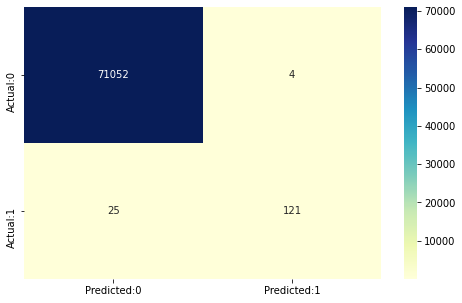

In [32]:
# confusion Matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71056
           1       0.97      0.83      0.89       146

    accuracy                           1.00     71202
   macro avg       0.98      0.91      0.95     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
- Using Oversampling technique we increase the sample size.

- Precision and recall score is better as compared to using undersampling technique.

As this dataset is imbalanced, we have used undersampling and oversampling method to check the classification report and different values like precision,recall and f1-score.

- But using this method for real time dataset is not a good option as 

    Undersampling causes loss of data
    
    while Oversampling can cause outliers and noise in the dataset.